In [4]:
import pandas as pd 
import numpy as np

import matplotlib.pylab as plt 
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

%matplotlib inline

In [5]:
df=pd.read_csv('E:\\Projects\\Data Science\\cv_projects\\titanic\\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
len(df.Cabin.unique())

148

In [9]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# <span style='color:blue'> <b> Clean data </b> </span>      

### 1- Clean Age Na Values 

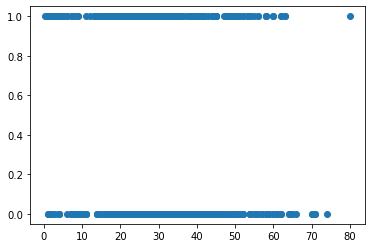

In [10]:
plt.scatter("Age",'Survived',data=df)

In [11]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
df.Age.replace(np.nan,df.Age.median(),inplace=True)

### 2- Clean Embarked Na Values

In [13]:
df.Embarked.replace(np.nan,df.Embarked.mode()[0],inplace=True)

# <span style='color:blue'> <b> Data Analysis </b> </span>      

In [14]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


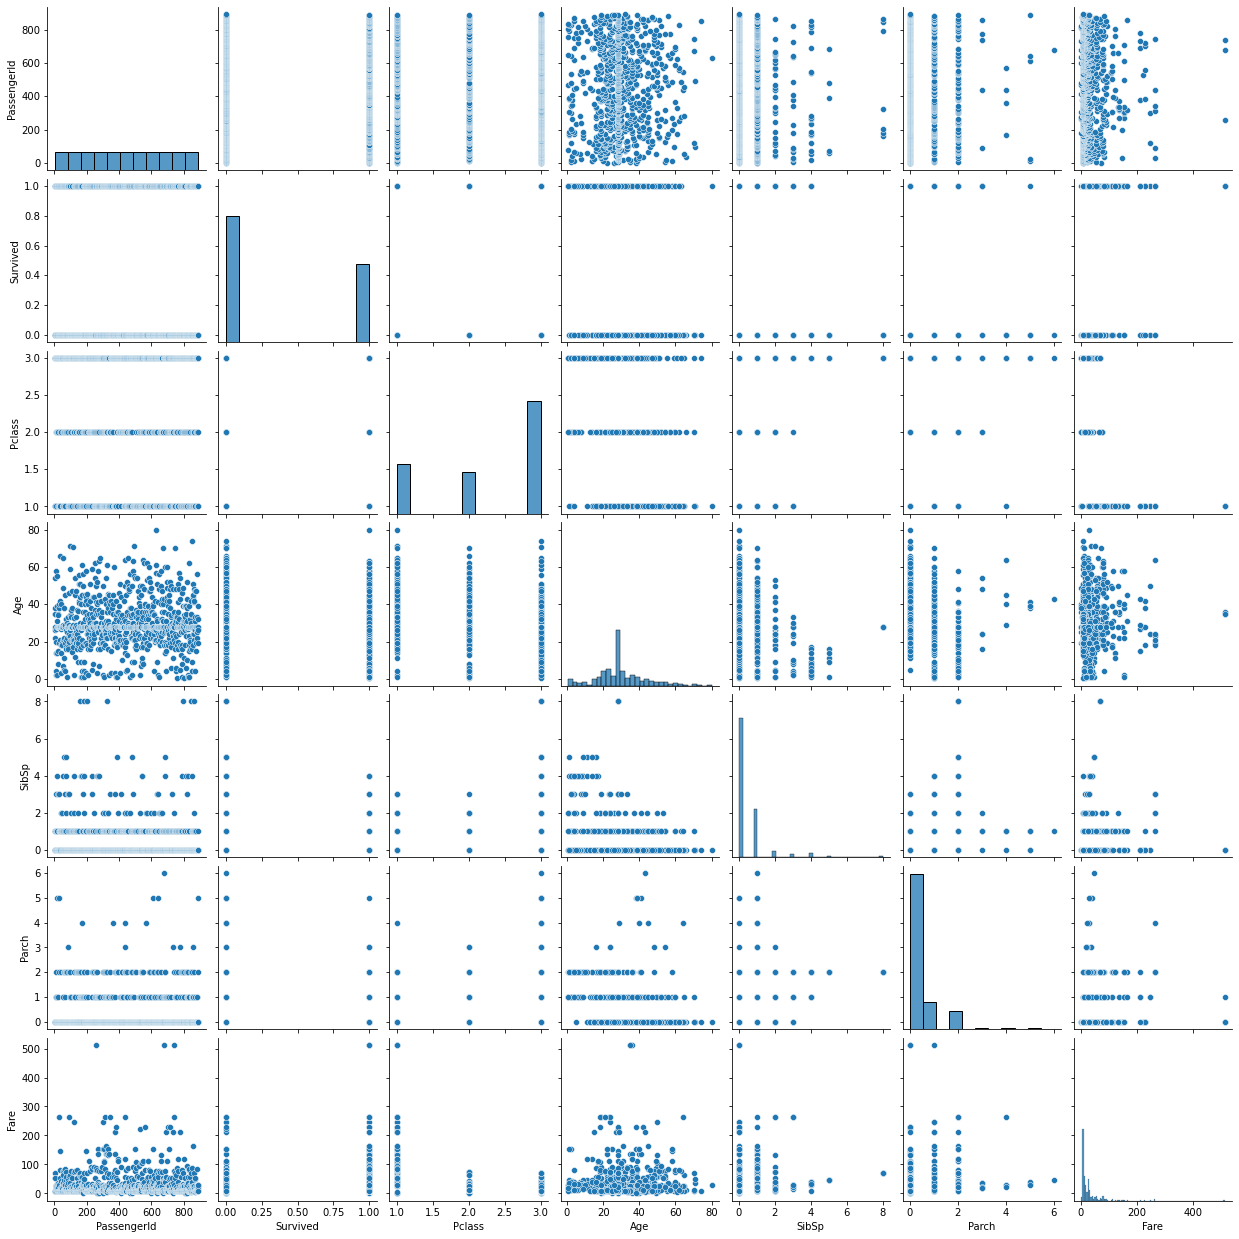

In [15]:
sns.pairplot(df)

### How many male and female in the ship ?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

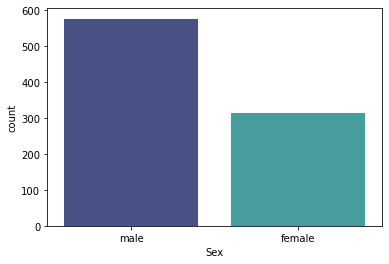

In [16]:
sns.countplot('Sex',palette='mako',data=df)

In [17]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

### How many male and female Survived ?

In [18]:
df[df.Survived==0].Sex.value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [19]:
q1=df[df.Survived==1]
q2=df[df.Survived==0]

o1=q1.Sex.value_counts()
o2=q2.Sex.value_counts()

print(" Survived : \n  Female : {}   ,   Male : {} ".format(o1[0],o1[1]))
print(" Not Survived : \n  Female : {}   ,   Male : {} ".format(o2[1],o2[0]))

 Survived : 
  Female : 233   ,   Male : 109 
 Not Survived : 
  Female : 81   ,   Male : 468 


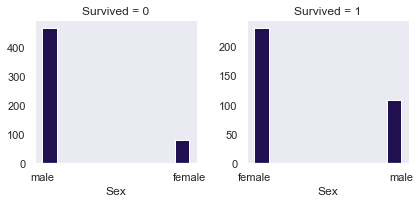

In [20]:
sns.set(style='dark', color_codes=True,palette="magma")
g = sns.FacetGrid(df, col='Survived',sharey=False, sharex=False,)
g.map(plt.hist, 'Sex',)

### What is the most Embarked has survived & un survived people ? 

<AxesSubplot:xlabel='Embarked'>

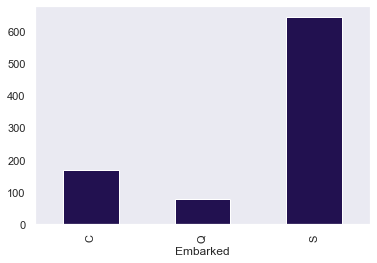

In [21]:
df.groupby('Embarked')['Embarked'].count().plot.bar()

#####   <span style='color:#00003f'> <b> Most of Traverlers going to Southampton </b> </span>      

In [22]:
q1=df[df.Survived==1]
q2=df[df.Survived==0]

o1=q1.Embarked.value_counts()
o2=q2.Embarked.value_counts()

print("Survived : \n" , o1)
print("Not Survived : \n" , o2)

Survived : 
 S    219
C     93
Q     30
Name: Embarked, dtype: int64
Not Survived : 
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


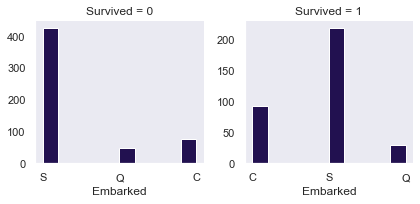

In [23]:
sns.set(style='dark', color_codes=True,palette="magma")
g = sns.FacetGrid(df, col='Survived',sharey=False, sharex=False)
g.map(plt.hist, 'Embarked',)

### What is the most target age in death ? 

In [24]:
df.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
pd.cut(df.Age,8)

0      (20.315, 30.263]
1       (30.263, 40.21]
2      (20.315, 30.263]
3       (30.263, 40.21]
4       (30.263, 40.21]
             ...       
886    (20.315, 30.263]
887    (10.368, 20.315]
888    (20.315, 30.263]
889    (20.315, 30.263]
890     (30.263, 40.21]
Name: Age, Length: 891, dtype: category
Categories (8, interval[float64]): [(0.34, 10.368] < (10.368, 20.315] < (20.315, 30.263] < (30.263, 40.21] < (40.21, 50.158] < (50.158, 60.105] < (60.105, 70.052] < (70.052, 80.0]]

In [26]:
def AgeConvertor(x):
    x=int(x)
    if x<10:
        return 0
    elif x in range(10,21):
        return 1
    elif x in range(20,31):
        return 2
    elif x in range(30,41):
        return 3
    elif x in range(40,51):
        return 4
    elif x in range(50,61):
        return 5
    elif x >=61:
        return 6

#####  <span style='color:#3A0C33'> <b> Add Ranged_Age Atrribute </b> </span>      

In [27]:
df['Ranged_Age']=df.Age.apply(lambda x:AgeConvertor(x))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ranged_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


In [28]:
q=df[df.Survived==0]
q.groupby('Ranged_Age')['Ranged_Age'].count().sort_values(ascending=False)

Ranged_Age
2    272
3     86
1     74
4     51
5     25
0     24
6     17
Name: Ranged_Age, dtype: int64

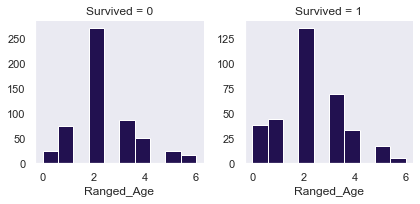

In [29]:
sns.set(style='dark', color_codes=True,palette="magma")
g = sns.FacetGrid(df, col='Survived',sharey=False, sharex=False)
g.map(plt.hist, 'Ranged_Age',)

#####  <span style='color:#00003f'> <b> Youth has the highest death rate </b> </span>      

### What is the most target title in death?

##### <span style='color:#3A0C33'> <b> Edit Name Atrribute </b> </span>      

In [30]:
df.rename(columns={'Name':'Title'},inplace=True)

In [31]:
df.Title=df.Title.apply(lambda x:x.split(',')[1].split('.')[0].strip())
df.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ranged_Age
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,3


In [32]:
q1=df.groupby('Title')['Title'].count().sort_values(ascending=False)
q1

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Capt              1
Mme               1
Lady              1
Jonkheer          1
Don               1
the Countess      1
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title'>

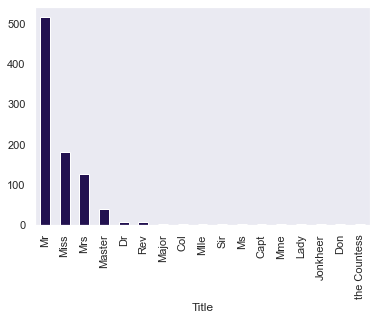

In [33]:
q1.plot.bar()

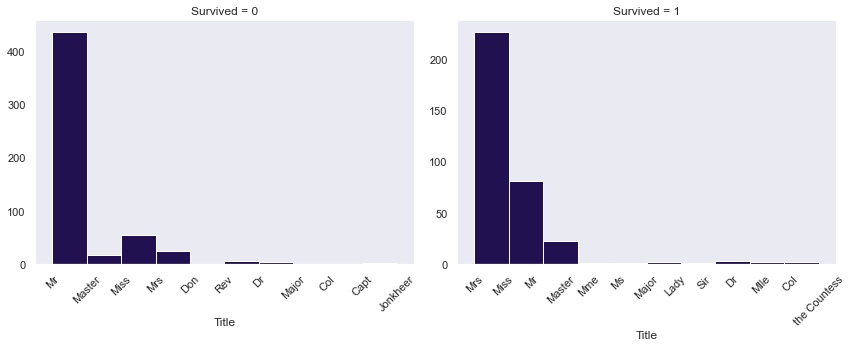

In [34]:
sns.set(style='dark', color_codes=True,palette="magma",)
g = sns.FacetGrid(df, col='Survived',sharey=False, sharex=False,height=5,aspect=1.2,)
g.map(plt.hist, 'Title',)
g.set_xticklabels(rotation=45)
g.fig.tight_layout()

<span style='color:#00003f'> <b> 1- Most Survivor are Ladies </b> </span>      
<span style='color:#00003f'> <b> 2- Most of high classes grades Survived </b> </span>      
<span style='color:#00003f'> <b> 3- Most of Deaths have Mr Title </b> </span>      

### What about Pclass?

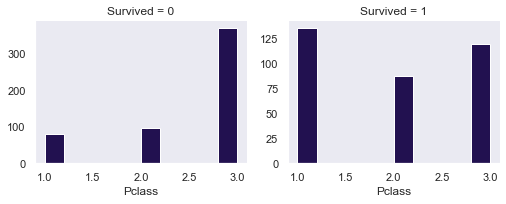

In [35]:
g=sns.FacetGrid(df,col='Survived',sharex=False,sharey=False,height=3,aspect=1.2)
g.map(plt.hist,'Pclass',)

<span style='color:#00003f'> <b> 1- it seems the most survivor class is class 1 </b> </span>    
<span style='color:#00003f'> <b> 2- the most un survivor class is class 3 more than 300 hundred person died in this class </b></span>   
<span style='color:#00003f'> <b> 3- class one was the optimal class </b> </span>

In [36]:
q=df.groupby('Pclass')['Pclass'].count()
q

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass'>

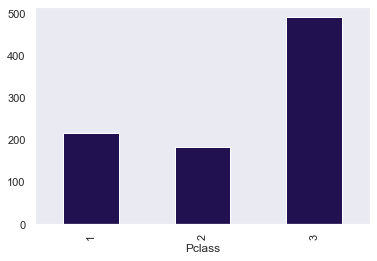

In [37]:
q.plot.bar()

<span style='color:#00003f'> <b> Class 3 was crowded more than 400 hundred person </b> </span>

### If the passenger has a company (childerns)? it will affect on his chance to survive?

#### to check that we want to add new attribute to count all Parch and SibSp 

#### <span style='color:#3A0C33'> <b> Add N_Company Atrribute </b> </span>

In [38]:
df['N_Company']=df.SibSp+df.Parch
df.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ranged_Age,N_Company
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,3,1
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,3,1
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,3,0


In [39]:
q=df.groupby('N_Company')['N_Company'].count()
q

N_Company
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: N_Company, dtype: int64

<AxesSubplot:xlabel='N_Company'>

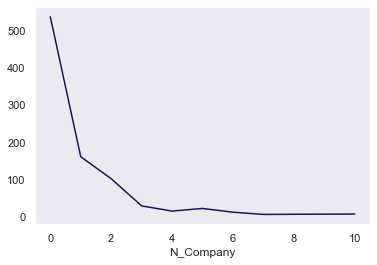

In [40]:
q.plot()

<span style='color:#00003f'> <b> Most of passengers has no company more than 500 hundred </b> </span>

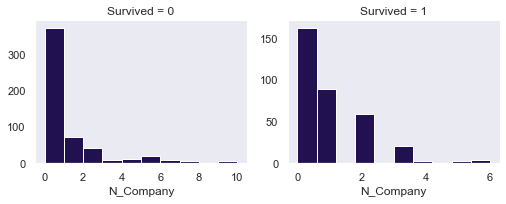

In [41]:
g=sns.FacetGrid(df,col='Survived',sharex=False,sharey=False,height=3,aspect=1.2)
g.map(plt.hist,'N_Company',)

In [42]:
df[df.Survived==1].groupby('N_Company')['N_Company'].count()

N_Company
0    163
1     89
2     59
3     21
4      3
5      3
6      4
Name: N_Company, dtype: int64

In [43]:
df[df.Survived==0].groupby('N_Company')['N_Company'].count()

N_Company
0     374
1      72
2      43
3       8
4      12
5      19
6       8
7       6
10      7
Name: N_Company, dtype: int64

<font  color='#00003f' > <b> who has more than 6 company will die 100% <b> <font/>      
<font  color='#00003f' > <b> the percntages for survivor if you have no company: 30%  <b> <font/>   
<font  color='#00003f' > <b> the percntages for survivor if you have 1 person: 55%  <b> <font/>      
<font  color='#00003f' > <b> the percntages for survivor if you have 2 person: 57%  <b> <font/>   
<font  color='#00003f' > <b> the percntages for survivor if you have 3 person: 72%  <b> <font/>         
<font  color='#00003f' > <b> the percntages for survivor if you have 4 person: 20%  <b> <font/>                   

# <span style='color:blue'> <b> Preprocessing The Data </b> </span>

In [44]:
df.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ranged_Age,N_Company
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,3,1
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,3,1
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,3,0


#####  <span style='color:#3A0C33'> <b>  Convert Sex to numerical data </b> </span>

In [45]:
df.Sex=df.Sex.apply(lambda x: 1 if x == 'male' else 0)
df.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ranged_Age,N_Company
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C,3,1
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S,3,1
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S,3,0


In [46]:
df.groupby('Embarked')['Embarked'].count().sort_values(ascending=False)

Embarked
S    646
C    168
Q     77
Name: Embarked, dtype: int64

#####  <span style='color:#3A0C33'> <b>  Convert Title to numerical data </b> </span>

In [47]:
def title_convertor(x):
    if x=='Mr':
        return 0
    elif x=='Miss':
        return 1
    elif x=='Mrs':
        return 2
    elif x=='Master':
        return 3
    elif x=='Dr':
        return 4
    elif x=='Rev':
        return 5
    elif x=='Major':
        return 6
    elif x=='Col':
        return 7
    else :
        return 8

In [48]:
df.Title=df.Title.apply(lambda x: title_convertor(x))
df.head(5)

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ranged_Age,N_Company
0,1,0,3,0,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,2,0,38.0,1,0,PC 17599,71.2833,C85,C,3,1
2,3,1,3,1,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0
3,4,1,1,2,0,35.0,1,0,113803,53.1000,C123,S,3,1
4,5,0,3,0,1,35.0,0,0,373450,8.0500,NaN,S,3,0


#####   <span style='color:#3A0C33'> <b>  Convert Embarked to numerical data </b> </span>

In [49]:
def embarked_convertor(x):
    if x=='S':
        return 0
    elif x=='C':
        return 1
    elif x=='Q':
        return 2

In [50]:
df.Embarked=df.Embarked.apply(lambda x:  embarked_convertor(x))
df.head(5)

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ranged_Age,N_Company
0,1,0,3,0,1,22.0,1,0,A/5 21171,7.2500,NaN,0,2,1
1,2,1,1,2,0,38.0,1,0,PC 17599,71.2833,C85,1,3,1
2,3,1,3,1,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,0
3,4,1,1,2,0,35.0,1,0,113803,53.1000,C123,0,3,1
4,5,0,3,0,1,35.0,0,0,373450,8.0500,NaN,0,3,0


#####   <font color='#3A0C33' >Scalling Fare<font/>

In [51]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [52]:
pd.qcut(df.Fare,5)[-1:-2]

Series([], Name: Fare, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]])

In [53]:
def scaling_fare(x):
    x=int(x)
    if x <7:
        return 0
    elif x in range(7,11):
        return 1
    elif x in range(11,22):
        return 2
    elif x in range(22,40):
        return 3
    elif x in range(40,80):
        return 4
    else:
        return 5

In [54]:
df.Fare=df.Fare.apply(lambda x: scaling_fare(x))
df.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ranged_Age,N_Company
0,1,0,3,0,1,22.0,1,0,A/5 21171,1,NaN,0,2,1
1,2,1,1,2,0,38.0,1,0,PC 17599,4,C85,1,3,1
2,3,1,3,1,0,26.0,0,0,STON/O2. 3101282,1,NaN,0,2,0
3,4,1,1,2,0,35.0,1,0,113803,4,C123,0,3,1
4,5,0,3,0,1,35.0,0,0,373450,1,NaN,0,3,0


#####  <span style='color:#3A0C33'> <b>  Prepare X and Y </b> </span>

In [55]:
X=df.drop(['PassengerId','Survived','Age','Ticket','Cabin','N_Company'],axis=1)
X.head()

,Pclass,Title,Sex,SibSp,Parch,Fare,Embarked,Ranged_Age
0,3,0,1,1,0,1,0,2
1,1,2,0,1,0,4,1,3
2,3,1,0,0,0,1,0,2
3,1,2,0,1,0,4,0,3
4,3,0,1,0,0,1,0,3


In [56]:
Y=df.Survived
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

#  <span style='color:#3A0C33'> <b>  Preparing test data</b> </span>

In [122]:
test_data=pd.read_csv('E:\\Projects\\Data Science\\cv_projects\\titanic\\test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
test_data.shape

(418, 11)

In [60]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [61]:
test_data.Age.replace(np.nan,df.Age.median(),inplace=True)

In [62]:
test_data.Fare.replace(np.nan,int(df.Fare.mean()),inplace=True)

In [63]:
def prepare_test_data(test_data):
    test_data['Ranged_Age']=test_data.Age.apply(lambda x:AgeConvertor(x))
    test_data.rename(columns={'Name':'Title'},inplace=True)
    test_data.Title=test_data.Title.apply(lambda x:x.split(',')[1].split('.')[0].strip())
    test_data.Sex=test_data.Sex.apply(lambda x: 1 if x == 'male' else 0)
    test_data.Title=test_data.Title.apply(lambda x: title_convertor(x))
    test_data.Embarked=test_data.Embarked.apply(lambda x:  embarked_convertor(x))
    test_data.Fare=test_data.Fare.apply(lambda x: scaling_fare(x))
    X_test=test_data.drop(['PassengerId','Age','Ticket','Cabin',],axis=1)
    return X_test


In [64]:
X_test=prepare_test_data(test_data)
X_test.head()

,Pclass,Title,Sex,SibSp,Parch,Fare,Embarked,Ranged_Age
0,3,0,1,0,0,1,2,3
1,3,2,0,1,0,1,0,4
2,2,0,1,0,0,1,2,6
3,3,0,1,0,0,1,0,2
4,3,2,0,1,1,2,0,2


# <span style='color:blue'> <b>  Build Model </b> </span>

In [65]:
X.head()

,Pclass,Title,Sex,SibSp,Parch,Fare,Embarked,Ranged_Age
0,3,0,1,1,0,1,0,2
1,1,2,0,1,0,4,1,3
2,3,1,0,0,0,1,0,2
3,1,2,0,1,0,4,0,3
4,3,0,1,0,0,1,0,3


###  <span style='color:#3A0C33'> <b> Find the best model and the hyperParameter tuning </b> </span>

In [98]:
collection = {
    
        'svm':{
            'model':SVC(gamma='auto'),
            'params':{
                'C':[10,20,30,40],
            }
        },
        'random_forest':{
           'model':RandomForestClassifier(),
            'params':{
                'n_estimators':[1,5,10,30,40,50]
            } 
        },
        'logistic_reg':{
            'model':LogisticRegression(solver='liblinear',multi_class='auto'),
            'params':{
                'C':[1,5,10],
            }
        },
        'naive_bayes_gaussian':{
            'model':GaussianNB(),
            'params':{}
        },
    
        'decision_tree':{
            'model':DecisionTreeClassifier(),
            'params':{
                'criterion':['entropy','gini']
            }
        }
    }

In [99]:
for model_name,data in collection.items() :
    clf=GridSearchCV(data['model'],data['params'],cv=5,return_train_score=False,)
    clf.fit(X,Y)
    print("{},{} =>{} ".format(model_name,clf.best_params_,clf.best_score_))

svm,{'C': 10} =>0.7979662293641328 
random_forest,{'n_estimators': 40} =>0.8170673529596385 
logistic_reg,{'C': 1} =>0.7957253154227606 
naive_bayes_gaussian,{} =>0.7722176887828762 
decision_tree,{'criterion': 'entropy'} =>0.7968677421379701 


#### <span style='color:#3A0C33'> <b> SVM is the best with C = 10 & linear kernel </b> </span>

In [100]:
svm=SVC(C=10)
svm.fit(X,Y)
svm.score(X,Y)

0.8496071829405163

#### <span style='color:#3A0C33'> <b> Random Forest with n_estimators 40 </b> </span>

In [105]:
random_forest_model=RandomForestClassifier(n_estimators=40)
random_forest_model.fit(X,Y)
random_forest_model.score(X,Y)

0.9068462401795735

####  <span style='color:#3A0C33'> <b> Use test data to predict </b> </span>

In [104]:
random_forest_model.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

####  <span style='color:#3A0C33'> <b> Evaluate a Classification Model for random forest </b> </span>

In [107]:
y_pred=random_forest_model.predict(X)
conf_mx=confusion_matrix(Y,y_pred)
conf_mx

array([[526,  23],
       [ 60, 282]], dtype=int64)

<AxesSubplot:>

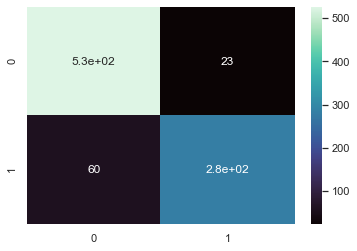

In [108]:
sns.heatmap(conf_mx,annot=True,cmap='mako')

In [110]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       549
           1       0.92      0.82      0.87       342

    accuracy                           0.91       891
   macro avg       0.91      0.89      0.90       891
weighted avg       0.91      0.91      0.91       891



<span style='color:#3A0C33'> <b> Record our result into data frame </b> </span>


In [123]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [126]:
passengerId=test_data.PassengerId
y_pred=random_forest_model.predict(X_test)
submissionDF=pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": y_pred
})
submissionDF.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [129]:
submissionDF.to_csv('./submission.csv', index=False)